# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
base_dir = os.getcwd()
mc_path = os.path.join(base_dir, 'data/marketing_campaign_clustered.csv')
dataset = pd.read_csv(mc_path)

In [18]:
dataset.head()

,MntWines,MntWines_Bin,Marital_Status,Cluster
0,0.518367,0,2,1
1,0.008980,3,2,2
2,0.347755,2,3,2
3,0.008980,3,3,2
4,0.141224,1,1,3


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MntWines        1249 non-null   float64
 1   MntWines_Bin    1249 non-null   int64  
 2   Marital_Status  1249 non-null   int64  
 3   Cluster         1249 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 39.2 KB


In [20]:
dataset.isnull().sum()

MntWines          0
MntWines_Bin      0
Marital_Status    0
Cluster           0
dtype: int64

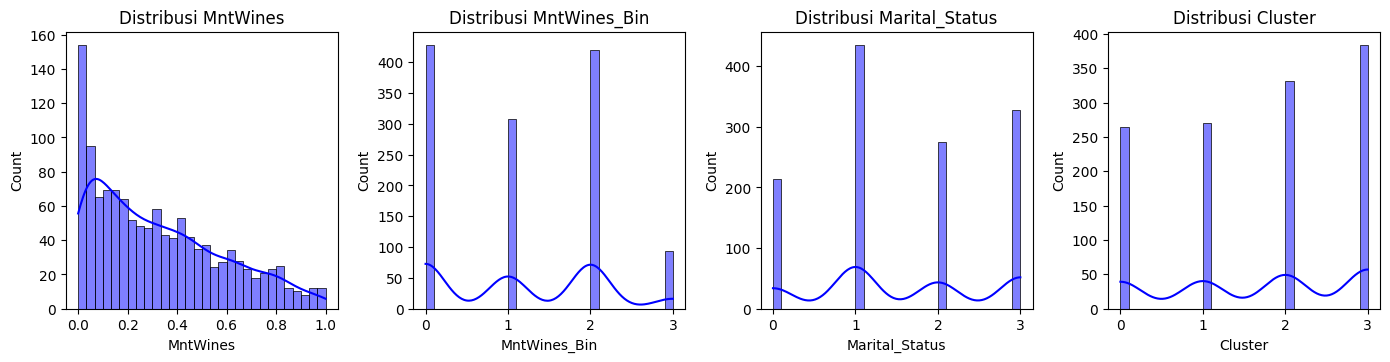

In [21]:
# Distribusi fitur numerik
num_features = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(dataset[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [9]:
# scaler = MinMaxScaler()
# numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
# dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# dataset.head()

,MntWines,MntWines_Bin,Marital_Status,Cluster
0,0.518367,0.000000,0.666667,0.333333
1,0.008980,1.000000,0.666667,0.666667
2,0.347755,0.666667,1.000000,0.666667
3,0.008980,1.000000,1.000000,0.666667
4,0.141224,0.333333,0.333333,1.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [22]:
# Pisahkan fitur (X) dan target (y)
X = dataset.drop(columns=['Cluster'])
y = dataset['Cluster']

In [23]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(999, 3), y_train=(999,)
Test set shape: X_test=(250, 3), y_test=(250,)


In [25]:
X_train.head()

,MntWines,MntWines_Bin,Marital_Status
925,0.793469,0,0
1018,0.017143,3,2
1113,0.474286,0,2
1007,0.100408,1,0
1032,0.506939,0,0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [27]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [36]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  # Gunakan 'weighted' untuk multikelas
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

In [37]:
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

In [38]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [39]:
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)     1.000   1.000000   1.000  1.000000
1            Decision Tree (DT)     1.000   1.000000   1.000  1.000000
2            Random Forest (RF)     1.000   1.000000   1.000  1.000000
3  Support Vector Machine (SVM)     1.000   1.000000   1.000  1.000000
4              Naive Bayes (NB)     0.936   0.948642   0.936  0.935168


In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 1.0


In [46]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44  0  0  0]
 [ 0 67  0  0]
 [ 0  0 65  0]
 [ 0  0  0 74]]


In [44]:
print("Distribusi kelas dalam y_train:", np.unique(y_train, return_counts=True))
print("Distribusi kelas dalam y_test:", np.unique(y_test, return_counts=True))

Distribusi kelas dalam y_train: (array([0, 1, 2, 3]), array([220, 203, 266, 310]))
Distribusi kelas dalam y_test: (array([0, 1, 2, 3]), array([44, 67, 65, 74]))


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

##### Hasil Analisis

Dimana pada hasil evaluasi model mendapatkan hasil hampir sempurna namun pada naive bayes tidak. Rekomendasi saya menambah jumlah dataset